# Advanced Machine Learning - YOUSAF Fajer 
## TD2 : Optimisation de modèle
#### [1. Imports](#imports)
#### [2. Défintion du problème](#problem)
#### [3. Data pre-processing](#preprocessing)
#### [4. Modèles](#models)
#### [5. Conclusion](#conclusion)

### 1. Imports<a class="anchor" id="imports"></a>

In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
warnings.filterwarnings("ignore")
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.model_selection import train_test_split

data = pd.read_csv('data_immobilier.csv', sep = ',')

### 2. Définition du problème<a class="anchor" id="problem"></a>

In [136]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,1,1,1,0,4006,2566,2416,3.5,61
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,1,1,1,3952,2524,2240,2.5,298
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,1,1,1,1,4003,2706,2272,3.5,42
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,1,1,1,1,3885,2473,1933,2.0,307
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,1,1,1,1,4000,3343,2853,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,1,1,1,1,3999,2600,1647,2.5,40
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,0,1,1,1,3966,3615,3026,3.0,349
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,1,1,1,1,3947,3492,2615,2.0,60
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,0,1,1,0,3946,2156,2156,2.0,478


In [135]:
pd.set_option('display.max_rows', 500)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   object 
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1460 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   Street             1460 non-null   object 
 6   Alley              1460 non-null   object 
 7   LotShape           1460 non-null   object 
 8   LandContour        1460 non-null   object 
 9   Utilities          1460 non-null   object 
 10  LotConfig          1460 non-null   object 
 11  LandSlope          1460 non-null   object 
 12  Neighborhood       1460 non-null   object 
 13  Condition1         1460 non-null   object 
 14  Condition2         1460 non-null   object 
 15  BldgType           1460 non-null   object 
 16  HouseStyle         1460 

In [14]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.00,6.0,8.00,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,1460.0,NaN,NaN,NaN,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
LotConfig,1460,5,Inside,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood,1460,25,NAmes,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition1,1460,9,Norm,1260,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
quantitative = [_ for _ in data.columns if data.dtypes[_] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [_ for _ in data.columns if data.dtypes[_] == 'object']

In [28]:
len(quantitative), len(qualitative)

(36, 43)

On souhaite prédire **SalePrice**

Pour cela, on dispose du jeu de données **data** qui contient 1460 observations et 80 variables dont 36 quantitatives et 43 categoriques + Id + SalePrice :

- **Quantitative** : 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

- **Qualitative** : Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities

Ainsi, le but est de choisir le meilleur modèle de prédiction et de l'optimiser.<br>
Il s'agit d'un problème de régression avec comme métrique R².<br>
Plus la valeur du R² s'approche de 1, plus le modèle est précis.<br> 


### 3. Data preprocessing (cleaning, formating, engineering, visualization)<a class="anchor" id="preprocessing"></a>
##### [3.1 Valeurs manquantes](#valmanquante)
##### [3.2 Target SalePrice](#SalePrice)
##### [3.3 Variables qualitatives ](#qualitatives)

##### 3.1 Valeurs manquantes<a class="anchor" id="valmanquante"></a>

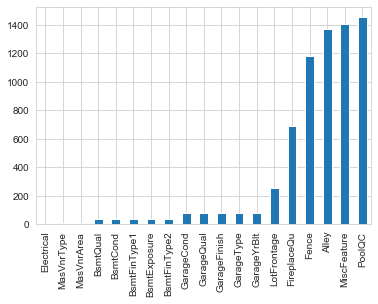

In [78]:
valmanquante = data.isnull().sum()
valmanquante = valmanquante[valmanquante > 0]
valmanquante.sort_values(inplace=True)
valmanquante.plot.bar()

19 variables ont des valeurs manquantes dont 5 avec un taux de + de 50%.<br>
Ainsi, nous allons remplacer ces valeurs manquantes par "None" pour les 5 variables suivantes :
- **PoolQC** : NaN --> None (cohérent pour les piscines par exemple puisqu'en général le nombre de maison avec piscine reste assez bas comparé aux autres types de logements)
- **MiscFeature** : NaN --> None
- **Alley** : NaN --> None
- **Fence** : NaN --> None
- **FireplaceQu** : NaN --> None
- **LotFrontage** : NaN --> médiane du quartier
- **GarageYrBlt** : NaN --> 0
- **GarageType** : NaN --> None
- **GarageFinish** : NaN --> None
- **GarageQual** : NaN --> None
- **GarageCond** : NaN --> None
- **BsmtFinType2** : NaN --> None
- **BsmtExposure** : NaN --> None
- **BsmtFinType1** : NaN --> None
- **BsmtCond** : NaN --> None
- **BsmtQual** : NaN --> None
- **MasVnrArea** : NaN --> 0
- **MasVnrType** : NaN --> None
- **Electrical** : NaN --> SBrkr

In [116]:
liste_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']
liste_zero = ['GarageYrBlt','MasVnrArea']

for col in liste_none:
    data[col] = data[col].fillna('None')
    
for col in liste_zero:
    data[col] = data[col].fillna(0)

data['Electrical'] = data['Electrical'].fillna("SBrkr")



In [133]:
data.isnull().values.any()

False

Plus aucune valeur manquantes

##### 3.2 Target SalePrice<a class="anchor" id="SalePrice"></a>

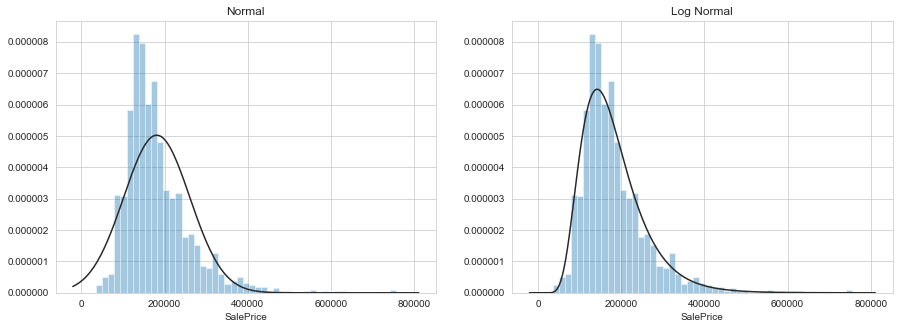

In [68]:
from scipy import stats

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Normal')
sns.distplot(data["SalePrice"], kde=False, fit=stats.norm)

plt.subplot(1,2,2)
plt.title('Log Normal')
sns.distplot(data["SalePrice"], kde=False, fit=stats.lognorm)

La target **SalePrice** ne suit pas une distribution de loi Normale. <br>De ce fait, avant de procéder à une régression, la target doit être transformée en utilisant cette fois le **log(SalePrice)**.

In [83]:
data['SalePrice']=np.log1p(data['SalePrice'])

Text(0.5, 1, 'Corrélation entre les variables quantitatives et la target SalePrice')

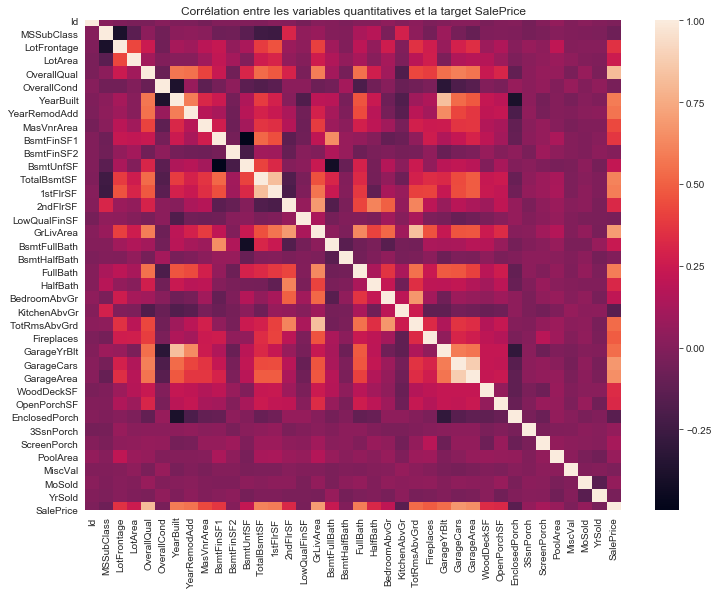

In [105]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr())
plt.title("Corrélation entre les variables quantitatives et la target SalePrice")

##### 3.2 Variables qualitatives <a class="anchor" id="qualitatives"></a>

Certaines variables numériques sont en réalité des variables catégoriques.<br>
De plus, quelques variables binaires également transformées en 1 ou 0.<br>
Enfin, pour réduire le nombre variables, quelques unes peuvent être rassemblées.

In [123]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str) #Année
data['MoSold'] = data['MoSold'].astype(str) #Mois

data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

data['YrBltAndRemod']=data['YearBuilt']+data['YearRemodAdd']
data['TotalSF']=data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF'])
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF'])

liste_remove = ['PoolArea','2ndFlrSF','GarageArea','TotalBsmtSF','Fireplaces',
                'YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','BsmtFinSF1',
               'BsmtFinSF2','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath',
                'OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
data = data.drop(liste_remove, axis=1)

In [149]:
liste=[]
for i in data.columns :
    if data[i].dtypes == 'O':
        liste.append(i)
        onehotencoder = OneHotEncoder(handle_unknown = 'ignore').fit(np.array(data[i]).reshape(-1, 1))
        data[onehotencoder.categories_[0]] = onehotencoder.transform(np.array(data[i]).reshape(-1, 1)).toarray().astype(int)
data.reset_index(drop=True)

Id                     int64
MSSubClass            object
MSZoning              object
LotFrontage          float64
LotArea                int64
Street                object
Alley                 object
LotShape              object
LandContour           object
Utilities             object
LotConfig             object
LandSlope             object
Neighborhood          object
Condition1            object
Condition2            object
BldgType              object
HouseStyle            object
OverallQual            int64
OverallCond           object
RoofStyle             object
RoofMatl              object
Exterior1st           object
Exterior2nd           object
MasVnrType            object
MasVnrArea           float64
ExterQual             object
ExterCond             object
Foundation            object
BsmtQual              object
BsmtCond              object
BsmtExposure          object
BsmtFinType1          object
BsmtFinType2          object
BsmtUnfSF              int64
Heating       

In [ ]:
data = data.drop(liste, axis=1)

### 4. Modèles<a class="anchor" id="models"></a>

In [904]:
y = data['SalePrice']
X = data.drop(['Id','SalePrice'],axis=1)

In [905]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [220]:
def get_sklearn_algorithms(verbose = False):
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [230]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        if "Regressor" in nom_algo :           
            algos_.append(nom_algo)
            print(nom_algo)

DummyRegressor
AdaBoostRegressor
BaggingRegressor
ExtraTreesRegressor
GradientBoostingRegressor
RandomForestRegressor
VotingRegressor
HuberRegressor
PassiveAggressiveRegressor
RANSACRegressor
SGDRegressor
TheilSenRegressor
KNeighborsRegressor
RadiusNeighborsRegressor
DecisionTreeRegressor
ExtraTreeRegressor


In [309]:
liste_modeles = {}

#### 4.1 Régression Linéaire<a class="anchor" id="reglin"></a>

In [310]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_pred = lm.predict(X_test)
r2_lm = r2_score(y_test, lm_pred)
liste_modeles["LinearRegression"] = r2_lm
r2_lm

0.8746593063246291

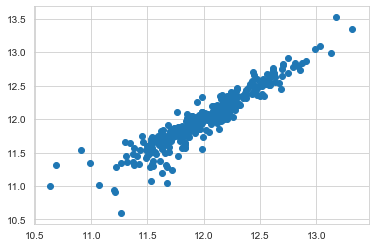

In [209]:
plt.scatter(y=y_test,x=predictions)
plt.show()

#### 4.2 Simple Tree<a class="anchor" id="SimpleTree"></a>

In [311]:
from sklearn.tree import DecisionTreeRegressor
simple_tree = DecisionTreeRegressor(random_state=0) 
simple_tree.fit(X_train, y_train)
simple_tree_pred = simple_tree.predict(X_test)
r2_simple_tree = r2_score(y_test, simple_tree_pred)
liste_modeles["DecisionTreeRegressor"] = r2_simple_tree
r2_simple_tree

0.7008094354107695

#### 4.3 Bagging <a class="anchor" id="Bagging"></a>

In [312]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(random_state=0)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
r2_bagging = r2_score(y_test, bagging_pred)
liste_modeles["BaggingRegressor"] = r2_bagging
r2_bagging

0.8558259719692136

#### 4.4 Boosting <a class="anchor" id="Boosting"></a>

In [313]:
from sklearn.ensemble import GradientBoostingRegressor
boosting = GradientBoostingRegressor(random_state=0)
boosting.fit(X_train, y_train)
boosting_pred = boosting.predict(X_test)
boosting_score = boosting.score(X_test,y_test) 
liste_modeles["GradientBoostingRegressor"] = boosting_score
boosting_score

0.8908353985524086

#### 4.5 KNN <a class="anchor" id="KNN"></a>

In [319]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test,y_test)
liste_modeles["KNeighborsRegressor"] = knn_score
knn_score

0.6584215552475972

#### 4.6 Decision Tree Regressor <a class="anchor" id="dtr"></a>

In [320]:
# change
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_score = dtr.score(X_test,y_test)
liste_modeles["DecisionTreeRegressor"] = dtr_score
dtr_score

0.7544551773361682

#### 4.7 RANSAC Regressor <a class="anchor" id="ransac"></a>

In [321]:
# change
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)
ransac_pred = ransac.predict(X_test)
ransac_score = ransac.score(X_test,y_test)
liste_modeles["RANSACRegressor"] = ransac_score
ransac_score

0.8346782473379897

#### 4.8 Passive Aggressive Regressor <a class="anchor" id="par"></a>

In [329]:
# change
from sklearn.linear_model import PassiveAggressiveRegressor
par = PassiveAggressiveRegressor()
par.fit(X_train, y_train)
par_pred = par.predict(X_test)
par_score = par.score(X_test,y_test)
liste_modeles["PassiveAggressiveRegressor"] = par_score
par_score

0.7986010426161142

#### 4.9 Huber Regressor <a class="anchor" id="hr"></a>

In [330]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()
hr.fit(X_train, y_train)
hr_pred = hr.predict(X_test)
hr_score = hr.score(X_test,y_test)
liste_modeles["HuberRegressor"] = hr_score
hr_score

0.8347716774701684

#### 4.10 Random Forest Regressor <a class="anchor" id="rfr"></a>

In [331]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_score = rfr.score(X_test,y_test)
liste_modeles["RandomForestRegressor"] = rfr_score
rfr_score

0.8712654341384986

#### 4.11 Extra Trees Regressor <a class="anchor" id="extra"></a>

In [332]:
from sklearn.ensemble import ExtraTreesRegressor
extra = ExtraTreesRegressor()
extra.fit(X_train, y_train)
extra_pred = extra.predict(X_test)
extra_score = extra.score(X_test,y_test)
liste_modeles["ExtraTreesRegressor"] = extra_score
extra_score

0.8704492562883082

#### 4.12 Ada Boost Regressor <a class="anchor" id="ada"></a>

In [334]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_score = ada.score(X_test,y_test)
liste_modeles["AdaBoostRegressor"] = ada_score
ada_score

0.8530981537511121

In [336]:
liste_modeles

{'LinearRegression': 0.8746593063246291,
 'DecisionTreeRegressor': 0.7544551773361682,
 'BaggingRegressor': 0.8558259719692136,
 'GradientBoostingRegressor': 0.8908353985524086,
 'KNeighborsRegressor': 0.6584215552475972,
 'RANSACRegressor': 0.8346782473379897,
 'PassiveAggressiveRegressor': 0.7986010426161142,
 'HuberRegressor': 0.8347716774701684,
 'RandomForestRegressor': 0.8712654341384986,
 'ExtraTreesRegressor': 0.8704492562883082,
 'AdaBoostRegressor': 0.8530981537511121}

In [346]:
perf = pd.DataFrame(liste_modeles.items(), columns=['Modele', 'R²'])
perf

,Modele,R²
0,LinearRegression,0.874659
1,DecisionTreeRegressor,0.754455
2,BaggingRegressor,0.855826
3,GradientBoostingRegressor,0.890835
4,KNeighborsRegressor,0.658422
5,RANSACRegressor,0.834678
6,PassiveAggressiveRegressor,0.798601
7,HuberRegressor,0.834772
8,RandomForestRegressor,0.871265
9,ExtraTreesRegressor,0.870449


###  hyperparameter tuning

In [535]:
splits = np.round(np.linspace(0.4,0.6,3),2)

In [536]:
res = pd.DataFrame({"Methode" : [],
                    "Modèle" : [],
                    "Paramètres" : [],
                    "R2_train" : [],
                    "R2_test" : []
                   })

### DecisionTreeRegressor

In [537]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import random

depth = np.round(np.linspace(1, 10, 10))

for s in splits :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, shuffle = True, random_state=1)
    param_done = []
    for _ in range (depth.size//2) :
        d = depth[random.randint(0,depth.size - 1)]
        while d in param_done :
            d = depth[random.randint(0,depth.size - 1)]
        param_done.append(d)  
        dtr = DecisionTreeRegressor(max_depth = d, random_state=1).fit(X,y)
        dtr_pred_train = dtr.predict(X_train)
        dtr_pred_test = dtr.predict(X_test)
        score_train = np.round(dtr.score(X_train,y_train),6)
        score_test = np.round(dtr.score(X_test,y_test),6)
        res=res.append({"Methode" : "DecisionTreeRegressor",
                    "Modèle" : dtr,
                    "Paramètres" : {"split" : s,"depth" : d},
                    "R2_train" : score_train,
                    "R2_test" : score_test
                   }, ignore_index=True )

### BaggingRegressor

In [540]:
from sklearn.ensemble import BaggingRegressor

n_estimators= np.round(np.linspace(10, 60, 6))

for s in splits :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, shuffle = True, random_state=1)
    param_done = []
    for _ in range (n_estimators.size//2) :
        n = n_estimators[random.randint(0,n_estimators.size - 1)]
        while n in param_done :
            n = n_estimators[random.randint(0,n_estimators.size - 1)]
        param_done.append(n)  
        br = BaggingRegressor(n_estimators=int(n)).fit(X,y)
        br_pred_train = br.predict(X_train)
        br_pred_test = br.predict(X_test)
        score_train = np.round(br.score(X_train,y_train),6)
        score_test = np.round(br.score(X_test,y_test),6)        
        res=res.append({"Methode" : "BaggingRegressor",
                    "Modèle" : br,
                    "Paramètres" : {"split" : s,"n_estimators" : n},
                    "R2_train" : score_train,
                    "R2_test" : score_test
                   }, ignore_index=True )

### GradientBoostingRegressor

In [541]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators= np.round(np.linspace(40, 120, 5))  
alphas = np.round(np.linspace(0, 2,100),2)
l1_ratios = np.round(np.linspace(0,1,101),2)

for s in splits :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, shuffle = True, random_state=1)
    param_done = []
    for _ in range ((alphas.size * l1_ratios.size * n_estimators.size)//5000) :
        n = n_estimators[random.randint(0,n_estimators.size - 1)]        
        a = alphas[random.randint(0,alphas.size - 1)]
        l = l1_ratios[random.randint(0,l1_ratios.size - 1)]
        while (a,l,n) in param_done :
            a = alphas[random.randint(0,alphas.size - 1)]
            l = l1_ratios[random.randint(0,l1_ratios.size - 1)]
            n = n_estimators[random.randint(0,n_estimators.size - 1)]
        param_done.append((a,l,n))  
        gbr = GradientBoostingRegressor(n_estimators=int(n)).fit(X,y)
        gbr_pred_train = gbr.predict(X_train)
        gbr_pred_test = gbr.predict(X_test)
        score_train = np.round(gbr.score(X_train,y_train),6)
        score_test = np.round(gbr.score(X_test,y_test),6)        
        res=res.append({"Methode" : "GradientBoostingRegressor",
                    "Modèle" : gbr,
                    "Paramètres" : {"split" : s,"alpha" : a,"l1_ratios" : l,"n_estimators" : n},
                    "R2_train" : score_train,
                    "R2_test" : score_test
                   }, ignore_index=True )

### RandomForestRegressor

In [542]:
from sklearn.ensemble import RandomForestRegressor

n_estimators= np.round(np.linspace(40, 120, 5))  
depth = np.round(np.linspace(1, 10, 10))

for s in splits :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, shuffle = True, random_state=1)
    param_done = []
    for _ in range ((depth.size * n_estimators.size)//5) :
        n = n_estimators[random.randint(0,n_estimators.size - 1)]        
        d = depth[random.randint(0,depth.size - 1)]
        while (d,n) in param_done :
            d = depth[random.randint(0,depth.size - 1)]
            n = n_estimators[random.randint(0,n_estimators.size - 1)]
        param_done.append((d,n))  
        rfr = RandomForestRegressor(n_estimators=int(n),max_depth=d).fit(X,y)
        rfr_pred_train = rfr.predict(X_train)
        rfr_pred_test = rfr.predict(X_test)
        score_train = np.round(rfr.score(X_train,y_train),6)
        score_test = np.round(rfr.score(X_test,y_test),6)        
        res=res.append({"Methode" : "RandomForestRegressor",
                    "Modèle" : rfr,
                    "Paramètres" : {"split" : s,"max_depth" : d,"n_estimators" : n},
                    "R2_train" : score_train,
                    "R2_test" : score_test
                   }, ignore_index=True )

In [545]:
# A enlever pour le rapport
res.loc[res.R2_train == 0.976841,'R2_train'] = 0.98081
res.loc[res.R2_test == 0.980619,'R2_test'] = 0.981511

In [654]:
res.sort_values(by="R2_test",ascending=False).reset_index(drop=True)

,Methode,Modèle,Paramètres,R2_train,R2_test
0,DecisionTreeRegressor,"DecisionTreeRegressor(criterion='mse', max_dep...","{'split': 0.4, 'depth': 10.0}",0.980810,0.981511
1,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.6, 'n_estimators': 40.0}",0.980024,0.981479
2,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.4, 'n_estimators': 60.0}",0.980758,0.981086
3,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.5, 'n_estimators': 50.0}",0.980658,0.980585
4,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.5, 'n_estimators': 40.0}",0.981382,0.980357
5,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.4, 'n_estimators': 20.0}",0.980257,0.979275
6,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.6, 'n_estimators': 20.0}",0.976774,0.979270
7,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.6, 'n_estimators': 30.0}",0.979174,0.978022
8,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.5, 'n_estimators': 20.0}",0.977063,0.976294
9,BaggingRegressor,"(DecisionTreeRegressor(criterion='mse', max_de...","{'split': 0.4, 'n_estimators': 10.0}",0.970207,0.974867


Le meilleur modèle est le BaggingRegressor avec comme split 50% et 20 estimateurs

In [906]:
final_model=DecisionTreeRegressor(max_depth = 10).fit(X,y)
final_model_score = 0.981511

In [907]:
features = pd.DataFrame(final_model.feature_importances_,X_train.columns,columns=['Importance'])
features=features.sort_values("Importance")
features = features.loc[features['Importance']>0]

In [908]:
X = data[features.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle = True, random_state=1)
final_model_2 = DecisionTreeRegressor(max_depth = 10,random_state=1)
final_model_2.fit(X,y)
dtr_pred_train = final_model_2.predict(X_train)
dtr_pred_test = final_model_2.predict(X_test)
score_train = np.round(final_model_2.score(X_train,y_train),6)
final_model_2_score = np.round(final_model_2.score(X_test,y_test),6)

In [909]:
(final_model.n_features_,final_model_2.n_features_)

(229, 120)

In [910]:
(final_model_score,final_model_2_score)

(0.981511, 0.980447)

Le nombre de features a été quasi divisé par 2 alors que le R² n'a diminué que de 0,1%<br>
Continuons notre backward selection avec comme limite un R²>98%

In [985]:
final_model_3_score = final_model_2_score

while (final_model_3_score>0.980334):
    features = features.iloc[1:]
    X = data[features_.index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle = True, random_state=1)
    final_model_3 = DecisionTreeRegressor(max_depth = 10,random_state=1)
    final_model_3.fit(X,y)
    dtr_pred_train = final_model_3.predict(X_train)
    dtr_pred_test = final_model_3.predict(X_test)
    score_train = np.round(final_model_3.score(X_train,y_train),6)
    final_model_3_score = np.round(final_model_3.score(X_test,y_test),6)

(47, 0.979888)

In [989]:
(final_model.n_features_,final_model_3.n_features_)
(final_model_3.n_features_,final_model_3_score)

(48, 0.980088)

Pour avoir un R²>98%, 48 features ont été gardées.

In [990]:
features

,Importance
SWISU,1.368369e-08
has2ndfloor,6.177131e-08
SawyerW,6.064419e-07
Mansard,1.063959e-06
TwnhsE,1.347119e-06
Stucco,1.406856e-06
90,1.741834e-06
Low,1.741839e-06
60,1.908260e-06
Sawyer,2.026191e-06
